# US16 - Análise do tempo de execução de algoritmo usando regressão polinomial 

# Introdução 

A análise de desempenho de algoritmos é fundamental para entender e otimizar o funcionamento de sistemas computacionais. Um dos aspectos cruciais dessa análise é o tempo de execução de algoritmos, que muitas vezes está relacionado com o tamanho dos conjuntos de dados de entrada.

Neste contexto, a regressão polinomial surge como uma ferramenta importante para modelar a relação entre o tamanho dos conjuntos de dados e o tempo de execução dos algoritmos. A regressão polinomial permite capturar padrões não lineares nos dados, o que pode ser crucial quando se trata de prever o desempenho do algoritmo em conjuntos de dados variáveis.

A US16 está relacionada à análise do comportamento do tempo de execução de um algoritmo, especificamente do algoritmo descrito na US13, sendo o objetivo principal a determinação da relação entre o tamanho da entrada do algoritmo (size - número de arestas) e o tempo de execução (time - segundos), utilizando técnicas de regressão polinomial. Assim, são identificados padrões no tempo de execução do algoritmo à medida que o tamanho da entrada varia, o que permite entender o desempenho do algoritmo em diferentes cenários e prever o seu comportamento para entrada de dados maiores.

Nesta US, os dados e resultados associados à US14 são utilizados como base para a análise - tempo de execução do algoritmo para diferentes tamanhos de conjuntos de dados. A técnica utilizada é a regressão polinomial, que consiste em ajustar uma curva polinomial aos dados de entrada e tempo de execução, com o objetivo de encontrar a melhor aproximação para a relação entre essas variáveis. 

Os dados de entrada são pares de valores (tamanho da entrada e tempo de execução), onde o tamanho da entrada é representado pelo número de arestas e o tempo de execução é medido em uma unidade de tempo específica, neste caso milissegundos.

O resultado desta US inclui o gráfico de dispersão associado aos dados, com a curva de regressão polinomial que melhor se ajusta aos dados, juntamente com o coeficiente de determinação. Este gráfico permite uma compreensão intuitiva do comportamento do tempo de execução do algoritmo à medida que o tamanho da entrada aumenta.

Para tal, utilizaremos a linguagem de programação Python, juntamente com a biblioteca Pandas para manipulação de dados, a biblioteca Scikit-learn para implementação da regressão polinomial e a biblioteca Matplotlib para visualização dos resultados.

**Fórmulas utilizadas**:

<u>Coeficiente de correlação amostral de Pearson</u><br>
$$
r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2 \sum_{i=1}^n (y_i - \bar{y})^2}},  -1 \leq r \leq 1
$$
$$
\text{r} - \text{Coeficiente de correlação amostral de Pearson}
$$
$$
n - \text{Número de dados}
$$
$$
x_i - \text{Valor x observado}
$$
$$
y_i - \text{Valor Y observado}
$$
$$
\bar{x} - \text{Média dos valores x}
$$
$$
\bar{y} - \text{Média dos valores y}
$$


<u>Média aritmética (Dados não classificados)</u><br>
$$
\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
<u>Coeficiente de determinação</u><br>
$$
r^2, 0 \leq r \leq 1
$$
    
<u>Método do mínimos quadrados</u><br>
$$
sqe = \sum_{i=1}^{n} ê^2_i
$$
$$
\text{sqe} - \text{Soma dos Quadrados dos Erros}
$$
$$
n - \text{Número de dados}
$$
$$
ê_i - \text{Erro de ajuste para o i-ésimo dado}
$$

<u>Erros de Ajuste</u><br>
$$
ê_i = y_i - \hat{y}_i
$$
$$
\text{ê_i} - \text{Erro de ajuste - distância vertical das observações y_i à reta de regressão}
$$
$$
y_i - \text{Valor real}
$$
$$
\hat{y}_i - \text{Valor aproximado na reta da regressão}
$$

<u>Regressão polinomial</u><br>
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_m x^m + \epsilon
$$
$$
y - \text{Variável dependente}
$$
$$
x - \text{Variável independente}
$$
$$
\beta_0 - \text{Constante da equação de regressão polinomial}
$$
$$
\beta_i - \text{Coeficiente de regressão associado a x^i (para i = 1, 2, ..., m)}
$$
$$
\epsilon - \text{Erro ou resíduo, ou seja, a diferença entre o valor observado e o valor estimado pelo modelo.}
$$


# Código

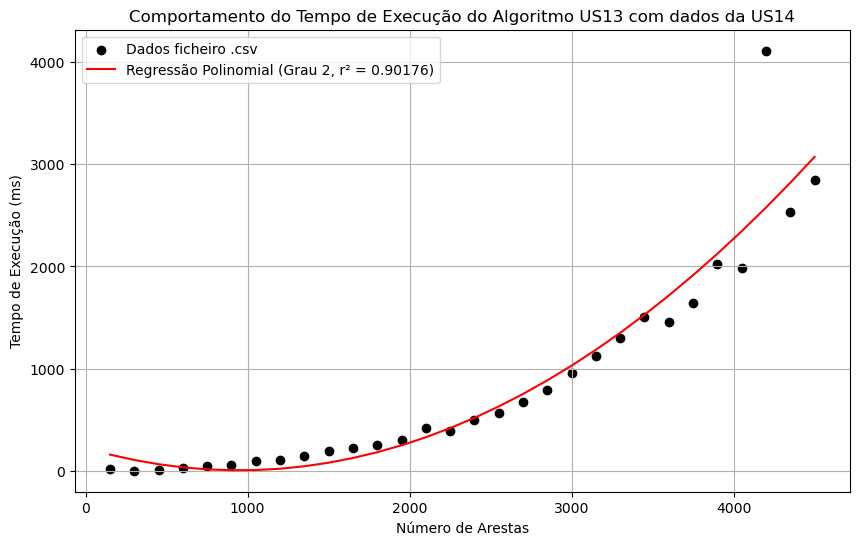

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Ler os dados do arquivo CSV, ignorando a primeira linha e especificando os nomes das colunas
column_names = ['size', 'time']
data = pd.read_csv("results.csv", delimiter=";", skiprows=1, names=column_names, dtype={'time': str})

# Substituir vírgulas por pontos e converter para float
data['time'] = data['time'].str.replace(',', '.').astype(float)


# Preparar os dados
X = data['size'].values.reshape(-1, 1)
y = data['time'].values


# Ajuste do modelo de regressão polinomial de grau 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Calcular o coeficiente de determinação (R²) para os modelos

r2_poly = r2_score(y, y_pred_poly)


# Plot os dados e os ajustes dos modelos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Dados ficheiro .csv')
plt.plot(X, y_pred_poly, color='red', label=f'Regressão Polinomial (Grau 2, r² = {r2_poly:.5f})')
plt.xlabel('Número de Arestas')
plt.ylabel('Tempo de Execução (ms)')  
plt.title('Comportamento do Tempo de Execução do Algoritmo US13 com dados da US14')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()

# Conclusão

A análise dos dados permite observar que o tempo de execução do algoritmo tende a aumentar à medida que o número de arestas nos conjuntos de dados aumenta. Isso sugere uma relação significativa entre a complexidade do problema e o tempo de processamento necessário para sua resolução.

Através da curva de regressão polinomial ajustada, identificamos padrões de comportamento nos dados - tempo de execução aumenta de forma linear, quadrática ou exponencial com o aumento do número de vértices -padrões essenciais para entender a escalabilidade do algoritmo e prever seu desempenho em conjuntos de dados maiores.

O ajuste da curva de regressão polinomial aos dados foi avaliada usando métricas como o coeficiente de determinação (r²) e, sendo um valor próximo de 1, indica um bom ajuste da curva aos dados. 

Assim, podemos desta análise concluir que a regressão polinomial permite retirar ilações práticas para o desenvolvimento e otimização de algoritmos, ou seja, se observarmos um aumento significativo no tempo de execução à medida que o número de arestas aumenta, pode ser necessária a implementação de estratégias de otimização para lidar com conjuntos de dados maiores de forma mais eficiente.